# DC apparent resistivity $\boldsymbol{\rho_a}$;  dipole-dipole

**¡Beware, this is still in development!**

TODOs:
- Clean-up and comment
- Add layout-figure
- Add models as inlet-plot to result-figures

In [1]:
import numpy as np                      # NumPy
import matplotlib.pyplot as plt         # Matplotlib
from matplotlib import rcParams         # To adjust some plot settings

from empymod import bipole              # Load required empymod functions

# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['font.style'] = 'normal'

## Calculate $\boldsymbol{\rho_a}$

In [2]:
def calc_apprho(depth, res, a, maxn, maxAB2, srcpts=1, recpts=1, verb=1, intlog=False):
    """Return apparent resistivity for dipole-dipole DC measurement
    
        rho_a = V/I pi a n (n+1) (n+2).
        
        where n = 3, 4, ..., maxn
    
    - Electric field due to an electric source, inline (y = 0 m).
    - Source of 1 A strength.
    - Source and receiver are located at the air-interface.
    - Source is centered at x = 0 m.
    
    Note: DC response can be obtained by either t->infinity s or f->0 Hz.
          f = 0 Hz is much faster, as there is no Fourier transform.
          
    IMPORTANT: it will return logarithmically spaced samples for n,
               integers. Output length of rho_a and AB/2 can be
               smaller than N!
          
    Returns rho_a and AB/2.
    """
    if intlog:
        n = np.logspace(np.log10(3), np.log10(2*maxAB2/a-1), maxn, dtype=int)
        n = np.unique(n)
    else:            
        n = np.logspace(np.log10(3), np.log10(2*maxAB2/a-1), maxn)
    AB = (n+1)*a
    model = {
        'src': [-a/2, a/2, 0, 0, 1e-3, 1e-3],
        'rec': [AB-a/2, AB+a/2, AB*0, AB*0, 1e-3, 1e-3],
        'depth': np.r_[0, np.array(depth, ndmin=1)],
        'freqtime': 1e-20,  # Smaller f would be set to 1e-20 be empymod.
        'verb': verb,       # Setting it to 1e-20 avoids warning-message.
        'res': np.r_[2e14, np.array(res, ndmin=1)],
        'strength': 1       # So it is NOT normalized to 1 m src/rec.
    }
    
    return np.real(bipole(**model))*np.pi*a*n*(n+1)*(n+2), AB/2

## Calculation and plot

In [3]:
def plotit(depth, a, maxn, maxAB2, res1, res2, res3, title):
    
    rho1, AB2 = calc_apprho(depth, res1, a, maxn, maxAB2)
    rho2, _ = calc_apprho(depth, res2, a, maxn, maxAB2)
    rho3, _ = calc_apprho(depth, res3, a, maxn, maxAB2)

    fig = plt.figure(figsize=(8,6), facecolor='w')

    plt.loglog(AB2, rho1, '.-', label='Case 1')
    plt.plot(AB2, rho2, '.-', label='Case 2')
    plt.plot(AB2, rho3, '.-', label='Case 3')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel('AB/2 (m)')
    plt.ylabel(r'Apparent resistivity $\rho_a (\Omega\,$m)')

    plt.show()

## Model 1

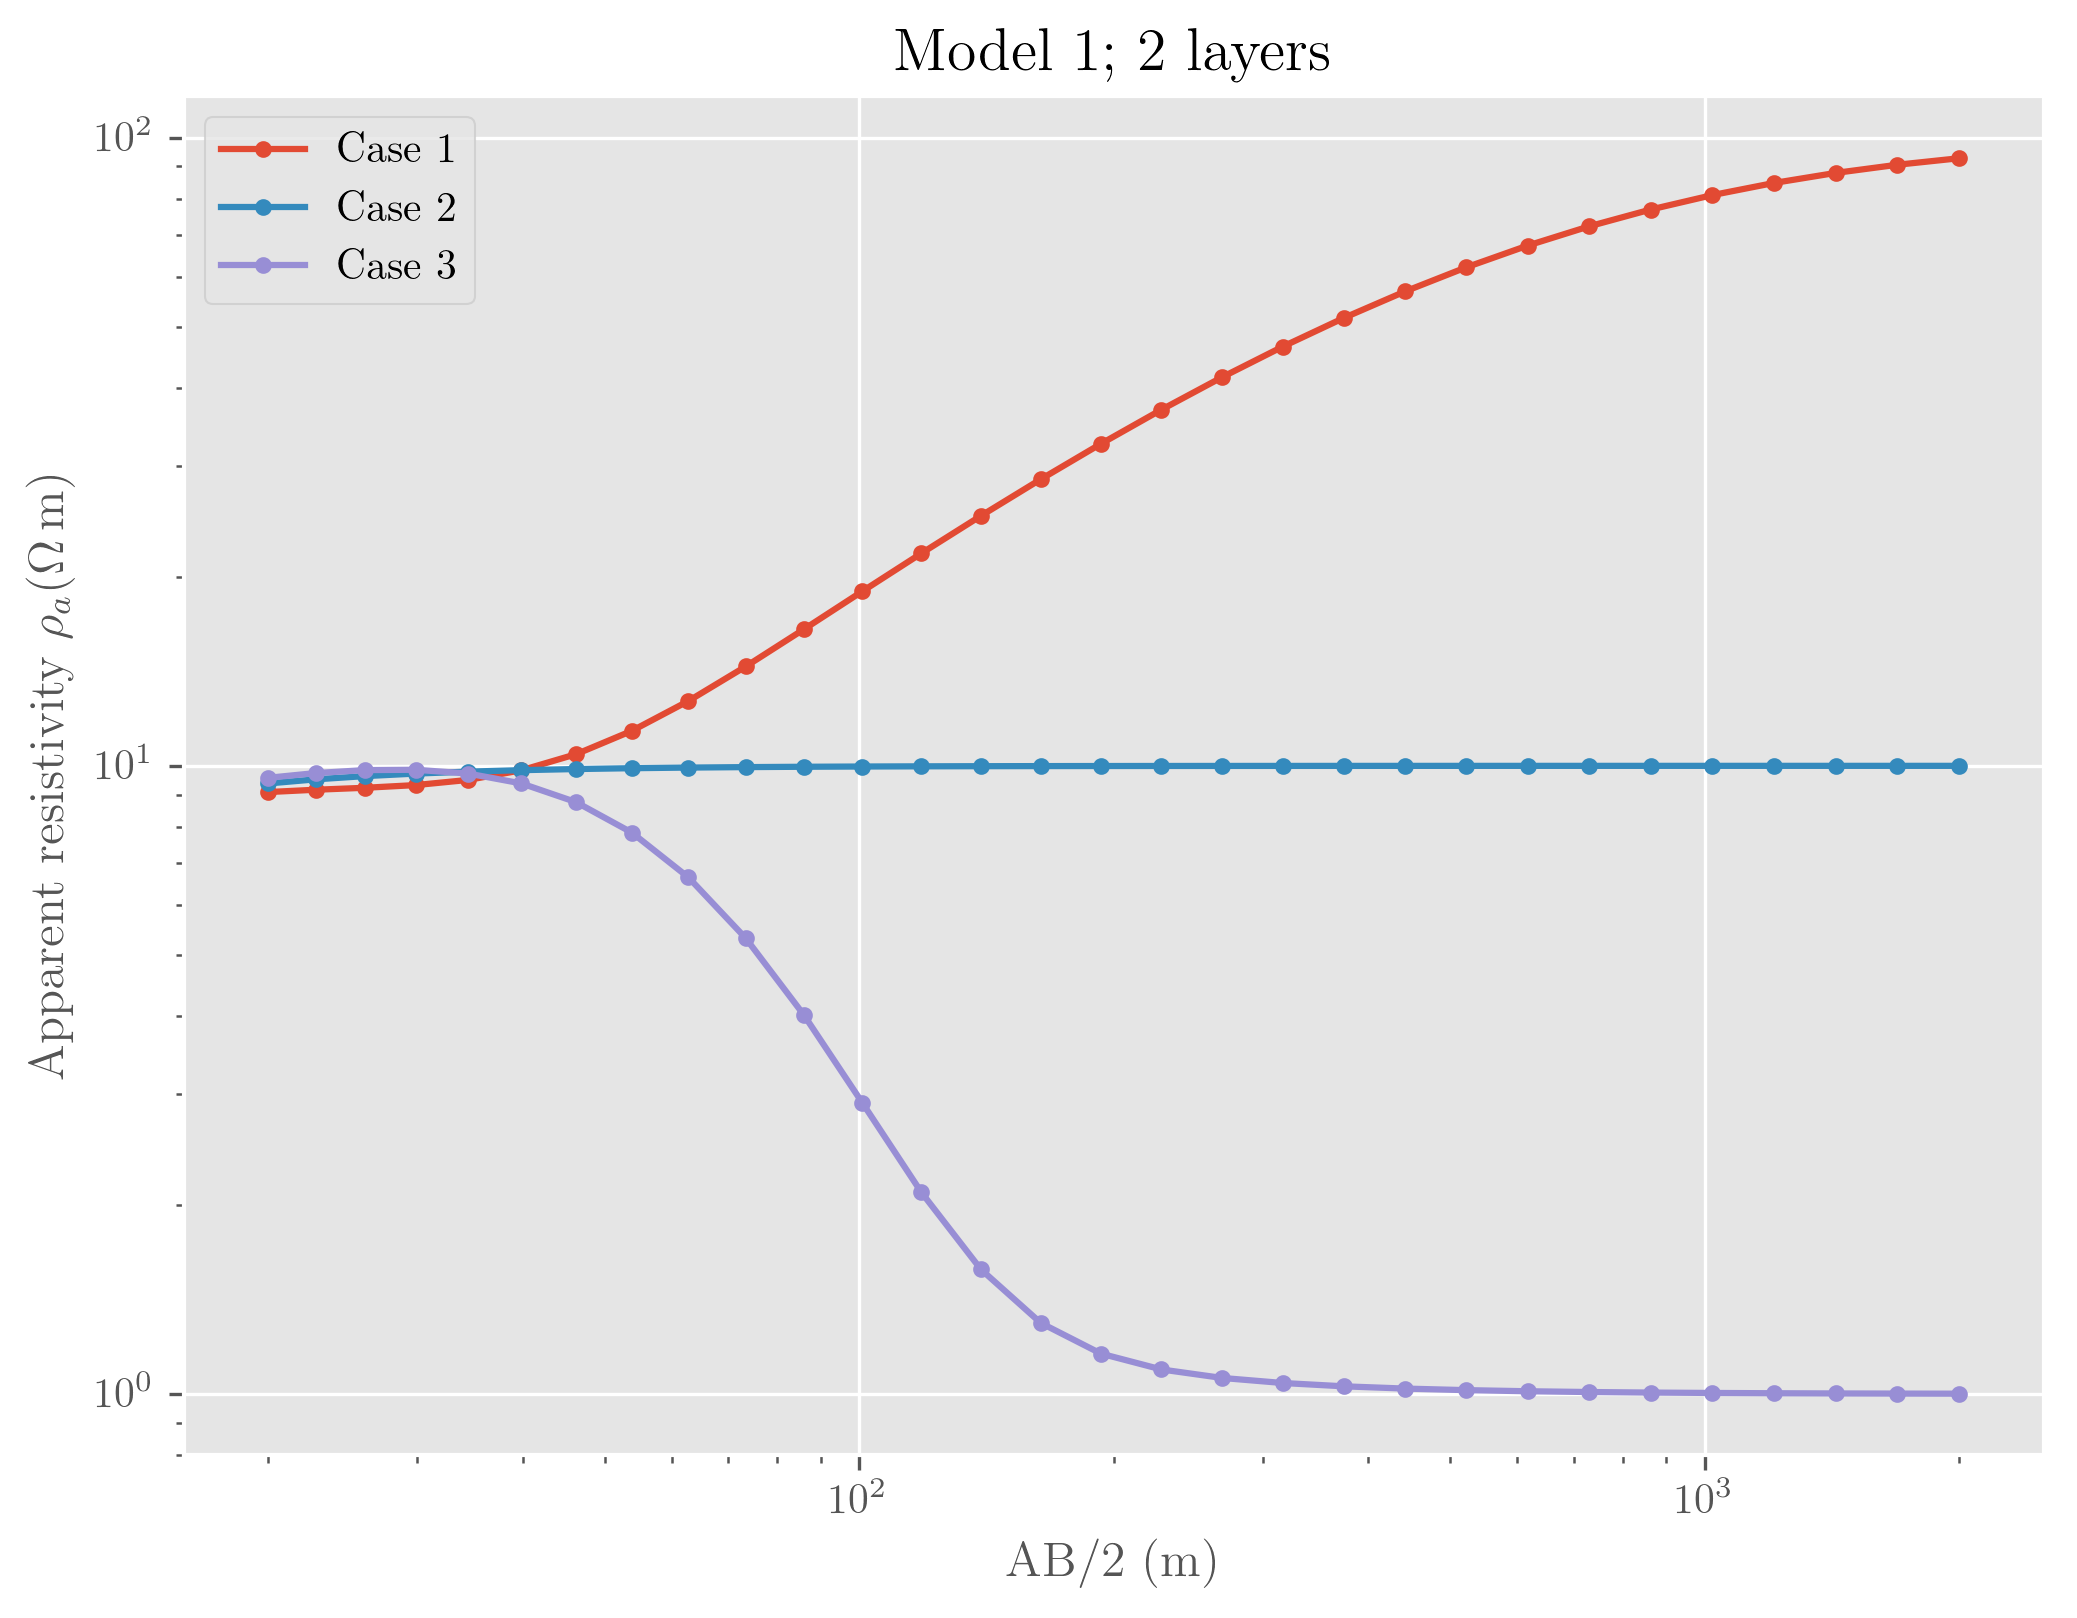

In [4]:
depth = 50
res1 = [10, 100]
res2 = [10,  10]
res3 = [10,   1]
plotit(depth, 10, 30, 2000, res1, res2, res3, 'Model 1; 2 layers')

## Model 2

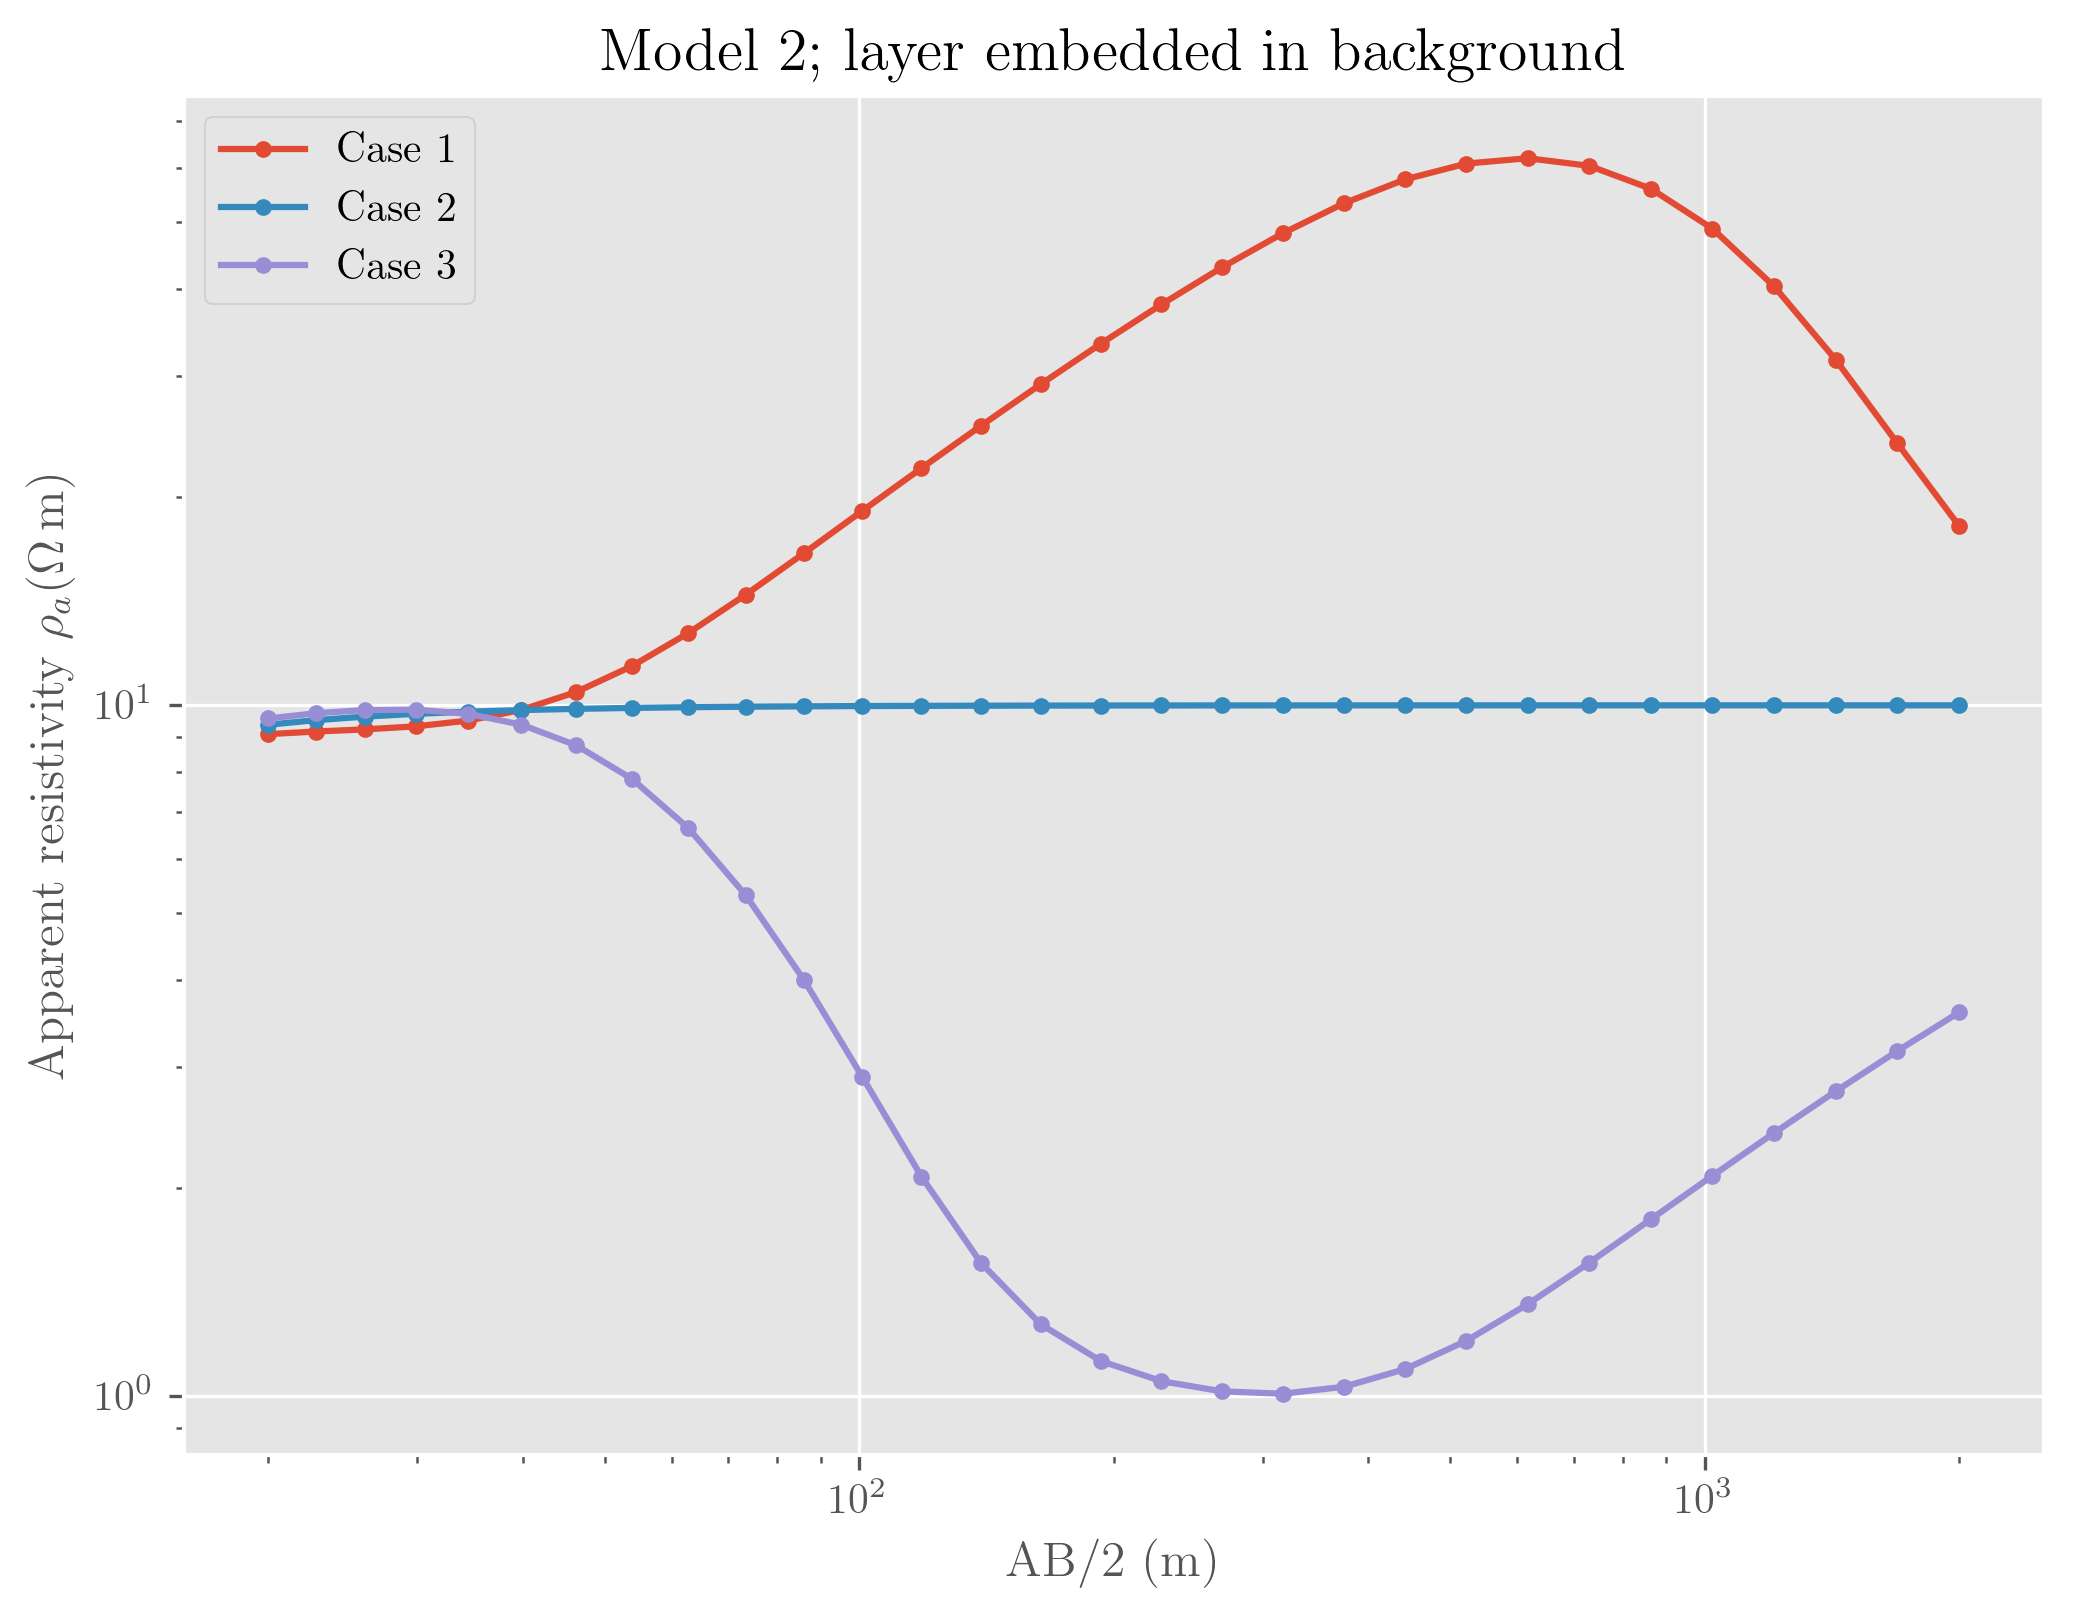

In [5]:
depth = [50, 500]
res1 = [10, 100, 10]
res2 = [10,  10, 10]
res3 = [10,   1, 10]
plotit(depth, 10, 30, 2000, res1, res2, res3, 'Model 2; layer embedded in background')

## Model 3

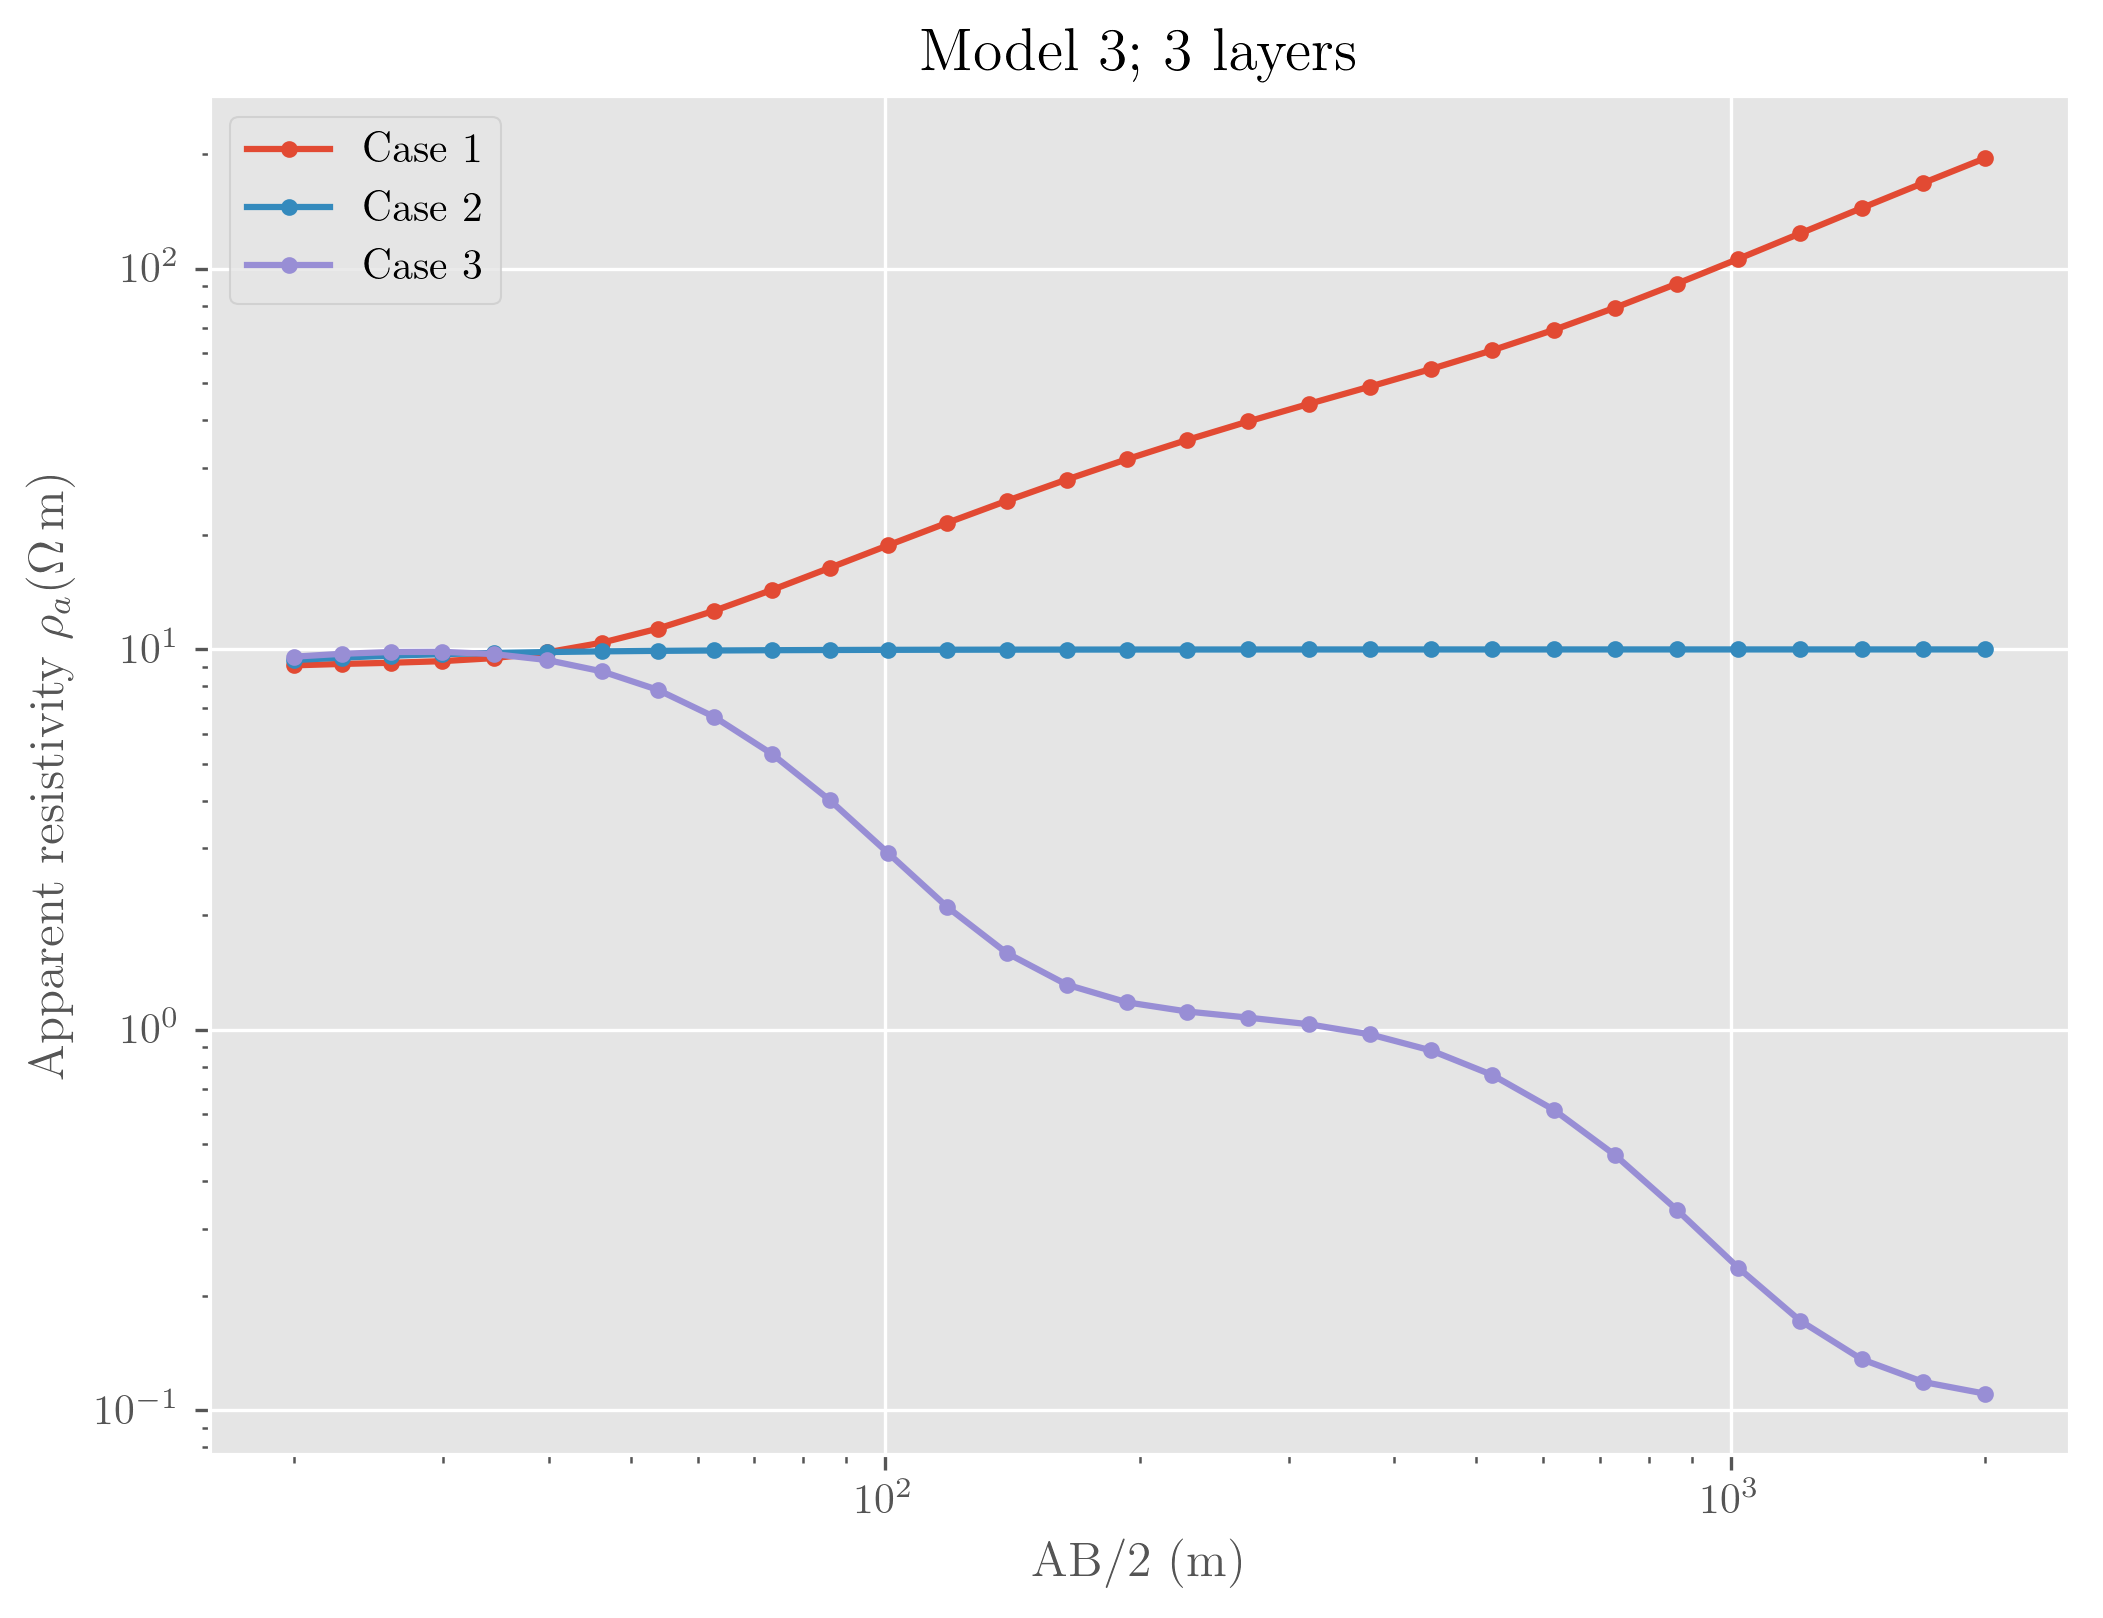

In [6]:
depth = [50, 500]
res1 = [10,   100, 1000  ]
res2 = [10,    10,   10  ]
res3 = [10,     1,    0.1]
plotit(depth, 10, 30, 2000, res1, res2, res3, 'Model 3; 3 layers')

In [7]:
import printinfo
printinfo.info()